## Imports

In [11]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [5]:
with open('data/camp_5000.pickle', 'rb') as read_file:
    df_camp_1 = pickle.load(read_file)
with open('data/camp_5001.pickle', 'rb') as read_file:
    df_camp_2 = pickle.load(read_file)

In [66]:
with open('data/df_kincade_5000.pickle', 'rb') as read_file:
    df_kincade_1 = pickle.load(read_file)
with open('data/kincade_5000.pickle', 'rb') as read_file:
    df_kincade_2 = pickle.load(read_file)

In [31]:
df_camp = pd.concat([df_camp_1, df_camp_2], axis=0)

In [32]:
df_camp['spell_trans'] = df_camp['spell_trans'].fillna(df_camp['text'])

In [67]:
df_kincade = pd.concat([df_kincade_1, df_kincade_2], axis=0)

/Users/brittb28/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [68]:
df_kincade['spell_trans'] = df_kincade['spell_trans'].fillna(df_kincade['text'])

In [76]:
df_kincade = df_kincade.reset_index(drop = True)

In [77]:
for i,tweet in enumerate(df_kincade['spell_trans']):
    if 'like wildfire' in tweet:
        df_kincade = df_kincade.drop(i)

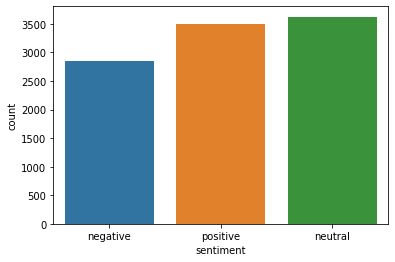

In [69]:
sns.countplot(df_kincade['sentiment'])

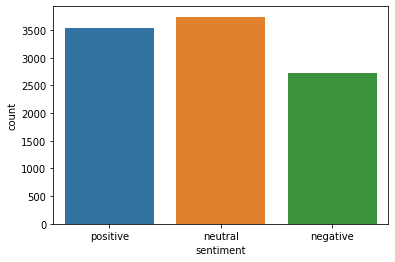

In [12]:
sns.countplot(df_camp['sentiment'])

## Models

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction import text 
from sklearn.decomposition import LatentDirichletAllocation

In [20]:
def tfidf(documents):
    my_additional_stop_words = ['wildfire', 'like', 'pron']
    stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)
    cv_tfidf = TfidfVectorizer(analyzer = 'word',ngram_range = (2,3), min_df = 3, stop_words=stop_words, token_pattern = "\\b[a-z][a-z]+\\b") 
    doc_word = cv_tfidf.fit_transform(documents)
    words = cv_tfidf.get_feature_names()
    id2word = dict((v, k) for k, v in cv_tfidf.vocabulary_.items())
    return doc_word, words, cv_tfidf

In [21]:
def dim_lsa(doc_word, no_topics):
    '''
    This function takes a sparse matrix map of documents to words and reduces the dimensions
    to topics. It returns an array of documents mapped to topics by "relatedness". Each row in the array
    has (no_topics) items in it.
    --------------------
    Inputs: sparse matrix, int
    Outputs: model, array, list
    '''
    lsa = TruncatedSVD(no_topics)
    doc_topic = lsa.fit_transform(doc_word)
    return lsa, doc_topic, lsa.explained_variance_ratio_

In [37]:
def display_topics(model, words, no_top_words, topic_names=None):
    '''
    This function takes a dim reduction model, words, number of words to display, and topic_names 
    (default= none). It returns strings of topics.
    ----------------
    Input: function, list, int
    Output: strs
    '''
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([words[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [45]:
def sk_lda(doc_word, n_topics):
    lda = LatentDirichletAllocation(n_components=n_topics,random_state=0)
    doc_topic = lda.fit_transform(doc_word)
    return lda, doc_topic, lda.exp_dirichlet_component_

## Camp Fire

In [35]:
doc_word, words, cv_tfidf = tfidf(df_camp['spell_trans'])

In [56]:
lsa, doc_topic, variance = dim_lsa(doc_word, 6)

In [52]:
lda, doc_topic, variance = sk_lda(doc_word, 3)

In [57]:
display_topics(lsa, words, 10)


Topic  0
cause million wildlife, million wildlife, gender reveal cause, reveal cause, reveal cause million, video gender, video gender reveal, cause million, gender reveal, reveal party

Topic  1
california wildlife, wildlife victim, california wildlife victim, wildlife relief, california wildlife relief, victim california, victim california wildlife, affect california, affect california wildlife, help california wildlife

Topic  2
reveal party, gender reveal party, dignity wildlife, party dignity, reveal party dignity, party dignity wildlife, official release, official release video, release video, release video gender

Topic  3
spread wildlife, social medium, wildlife california, rumor spread wildlife, rumor spread, wildlife know, lie spread, lie spread wildlife, rumour spread wildlife, rumour spread

Topic  4
accuse use, official accuse, official accuse use, tramp official, deadly wildlife, tramp official accuse, use deadly, use deadly wildlife, wildlife boost, deadly wildlife boos

## Kincade Fire

In [78]:
doc_word, words, cv_tfidf = tfidf(df_kincade['spell_trans'])

In [81]:
lsa, doc_topic, variance = dim_lsa(doc_word, 3)

In [52]:
lda, doc_topic, variance = sk_lda(doc_word, 3)

In [82]:
display_topics(lsa, words, 10)


Topic  0
federal aid, federal aid california, aid california, devastating continue, vow federal, vow federal aid, california devastating, aid california devastating, california devastating continue, devastating continue burn

Topic  1
threaten cut, trump threaten cut, trump threaten, funding california, cut funding, threaten cut funding, threaten cut federal, cut funding california, cut federal, federal funding

Topic  2
california wildlife, southern california, southern california wildlife, climate change, california wildlife signal, wildlife signal, battle stubborn, stubborn southern california, battle stubborn southern, stubborn southern
